In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
# import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time

sys.path.insert(0, "/home/bryanb/blimpy/")
import blimpy as bl

In [3]:
wf = bl.Waterfall('first_on.fil')

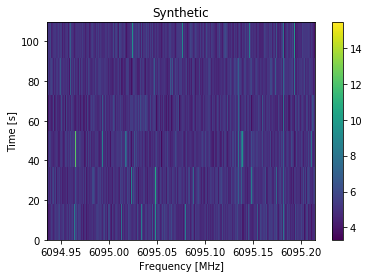

In [6]:
wf.plot_waterfall(logged=False)

In [7]:
wf.write_to_hdf5('test.h5')

blimpy.waterfall INFO     Conversion time: 0.04sec


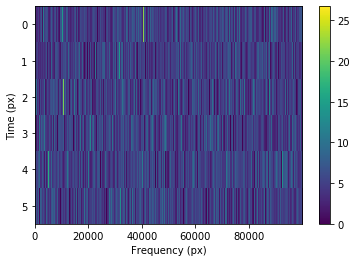

In [8]:
sys.path.insert(0, "/home/bryanb/setigen/")

import setigen as stg
frame = stg.Frame(waterfall='first_on.fil')
frame.render()

In [9]:
frame.get_waterfall().write_to_fil('test.fil')

blimpy.waterfall INFO     Conversion time: 0.03sec


In [10]:
frame.save_h5('test1.h5')

blimpy.waterfall INFO     Conversion time: 0.05sec


In [6]:
frame.get_waterfall().write_to_hdf5('test.h5')

ValueError: Unable to create dataset (error during user callback)

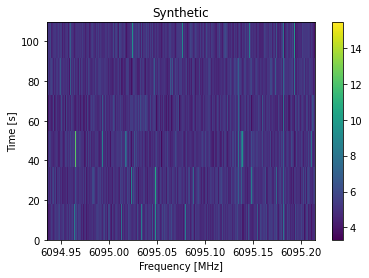

In [8]:
wf1 = bl.Waterfall('test.fil')
wf1.plot_waterfall(logged=False)

In [13]:
sys.path.insert(0,'/home/bryanb/turbo_seti/')
from turbo_seti.find_doppler.find_doppler import FindDoppler

out_directory = './'
find_seti_event = FindDoppler('first_on.fil',
             max_drift=5,snr=10,out_dir=out_directory,
             obs_info=None)
find_seti_event.search()

In [74]:
frame_shape = (3, 2048*4)

x = 1000

wf = bl.Waterfall('/datax/scratch/bbrzycki/data/blc14_guppi_57991_48899_3C161_0007.gpuspec.0000.fil',
                  f_start=7251.46484375 - x * 2.7939677238464355e-06,
                  f_stop=7251.46484375 - (x + 2048*4) * 2.7939677238464355e-06,
                  t_stop=300)
wf.header

{'rawdatafile': 'guppi_57991_48899_3C161_0007.0000.raw',
 'source_name': '3C161',
 'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 6.45314667 hourangle>,
 'src_dej': <Angle -4.9156 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 7251.46484375,
 'foff': -2.7939677238464355e-06,
 'nchans': 67108864,
 'nbeams': 1,
 'ibeam': 1,
 'nbits': 32,
 'tstart': 57991.56596064815,
 'tsamp': 18.253611008,
 'nifs': 1}

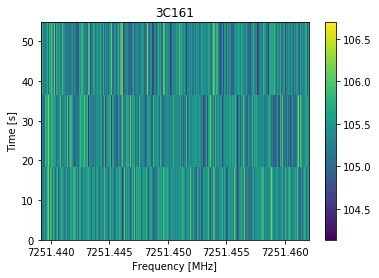

In [75]:
wf.plot_waterfall()

In [76]:
2.7939677238464355 * 18.253611008

51.0

34783924000.0 3477714200.0
34753432475.39696 3435937025.6357813


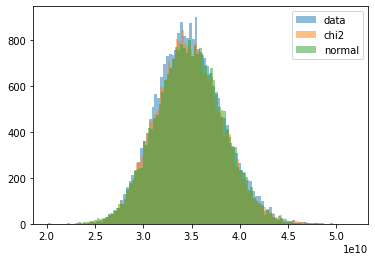

In [84]:
plt.hist(wf.data.flatten(), bins=100, alpha=0.5, label='data')
print(np.mean(wf.data.flatten()), np.std(wf.data.flatten()))

mean = np.mean(wf.data.flatten())


f = 4

dist = np.random.chisquare(df=f * 51, size=frame_shape) * mean/(f * 51)
plt.hist(dist.flatten(), bins=100, alpha=0.5, label='chi2')

print(np.mean(dist), np.std(dist))

dist = np.random.normal(mean, wf.data.flatten().std(), size=frame_shape)
plt.hist(dist.flatten(), bins=100, alpha=0.5, label='normal')

plt.legend()

plt.show()

In [43]:
(np.random.chisquare(df=2 * 51, size=1000000).min()) * mean/(2 * 51)

16168895338.40419

In [45]:
np.random.normal(mean, wf.data.flatten().std(), size=1000000).min()

15473277352.31065

In [86]:
fn = '/datax/scratch/bbrzycki/random_transiter/data/spliced_blc40414243444546o7o0515253545556o7o0616263646566o7o071727374757677_guppi_58667_16235_HD139139_0029.gpuspec.0000.h5'

x=100

wf = bl.Waterfall(fn,
                  f_start=8438.964842353016 - x * 2.7939677238464355e-06,
                  f_stop=8438.964842353016 - (x + 1024) * 2.7939677238464355e-06)
wf.header

{'DIMENSION_LABELS': array([b'frequency', b'feed_id', b'time'], dtype=object),
 'az_start': 0.0,
 'data_type': 1,
 'fch1': 8438.964842353016,
 'foff': -2.7939677238464355e-06,
 'machine_id': 20,
 'nbits': 32,
 'nchans': 1744830464,
 'nifs': 1,
 'source_name': 'HD139139',
 'src_dej': <Angle -19.172 deg>,
 'src_raj': <Angle 15.68364667 hourangle>,
 'telescope_id': 6,
 'tsamp': 18.253611008,
 'tstart': 58667.18790509259,
 'za_start': 0.0}

67184310.0 6616688.5
67168404.3528399 6706141.651701468


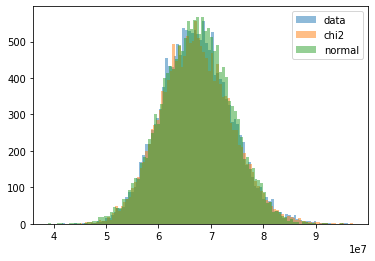

In [106]:
plt.hist(wf.data.flatten(), bins=100, alpha=0.5, label='data')
print(np.mean(wf.data.flatten()), np.std(wf.data.flatten()))

mean = np.mean(wf.data.flatten())


f = 4

dist = np.random.chisquare(df=f * 51, size=wf.data.flatten().shape) * mean/(f * 51)
plt.hist(dist.flatten(), bins=100, alpha=0.5, label='chi2')

print(np.mean(dist), np.std(dist))

dist = np.random.normal(mean, wf.data.flatten().std(), size=wf.data.flatten().shape)
plt.hist(dist.flatten(), bins=100, alpha=0.5, label='normal')

plt.legend()

plt.show()